# Importing Libraries

In [1]:
# Installing statsmodels
# !pip install statsmodels
# !pip install seaborn

In [2]:
import pandas as pd
import numpy as np

# Library for doing EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Library for Linear Regression Model
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [3]:
# Changing the Jupyter Notebook options
pd.set_option('display.max_columns', None)

<br>

# Loading the data

In [4]:
df = pd.read_csv("day.csv") # importing the csv data

# See the data dictionary
with open("Readme.txt", "r") as f:
    data_description = f.read()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Data Description

In [6]:
print(data_description.split("=========================================\nLicense")[0])

Dataset characteristics
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	



In [7]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# Dropping `instant` column as it is just an index column
df.drop(["instant"], axis=1, inplace=True)

The Target variable is: <b>cnt</b><br>
Because, we want to predict for any particular day what will be the number of sales given these parameter

# EDA

#### We want to perform some EDA on the data to see the correlation, see the outliers and etc.

In [9]:
# Check for null vaulues
df.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### See the trend of the cnt with the date

In [10]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
percent_increase = int(round((sum(df[df["yr"] == 1]["cnt"]) - sum(df[df["yr"] == 0]["cnt"])) / sum(df[df["yr"] == 0]["cnt"]), 2) * 100)

f"Percent Increase in shares from 2018 to 2019: {percent_increase}%"

'Percent Increase in shares from 2018 to 2019: 65%'

In [12]:
df.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [13]:
# Changing the date column to datetime
df["dteday"] = pd.to_datetime(df["dteday"], dayfirst=True)

<Axes: title={'center': 'Sales Month wise'}, xlabel='dteday', ylabel='cnt'>

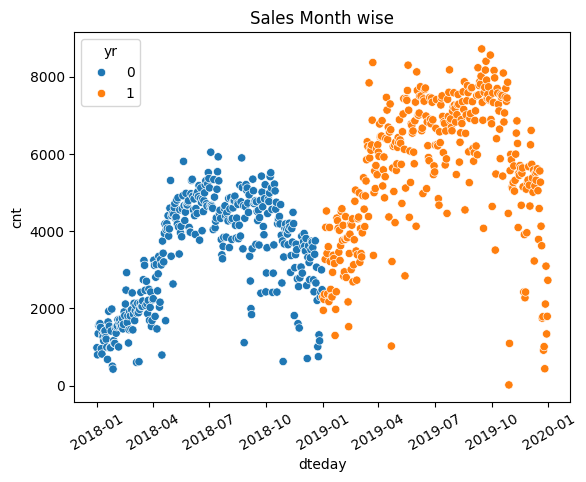

In [14]:
plt.title("Sales Month wise")
plt.xticks(rotation=30)
sns.scatterplot(data=df, x="dteday", y="cnt", hue="yr")

In [15]:
# We already have values from dteday into different columns - day, month, year
## So we will drop this as this will be redundant
df.drop("dteday", axis=1, inplace=True)

In [16]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<Axes: >

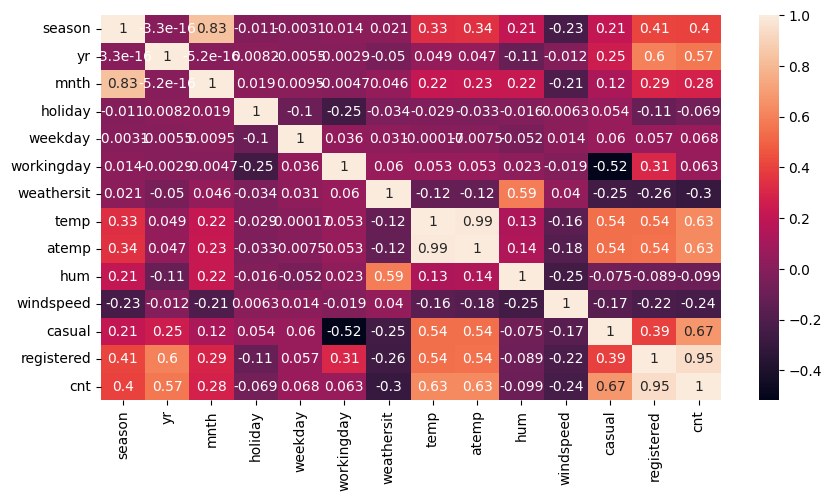

In [17]:
# Correlation matrix
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)

In [18]:
# We can see that `temp` and `atemp` are highly correlated(0.9), so we can drop one of it.
## Choosing `temp` to drop, because `atemp` makes more sense in real life
df.drop(["atemp"], axis=1, inplace=True, errors="ignore")


# `season` and `mnth` are also highly correlated, hence dropping one
## Choosing `month` to drop because `season` has less number of distinct values
df.drop(["mnth"], axis=1, inplace=True, errors="ignore")

<Axes: title={'center': 'Sales of bikes in year 2018 & 2019'}, xlabel='season', ylabel='cnt'>

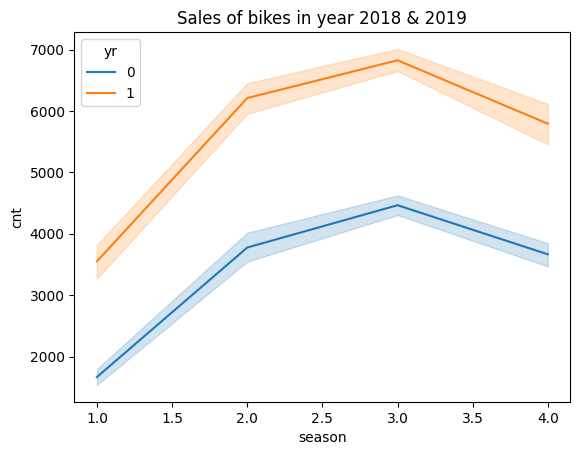

In [19]:
plt.title("Sales of bikes in year 2018 & 2019")
sns.lineplot(data=df, x="season", y="cnt", hue="yr")

#### Conclusion: We can see the same trend of `cnt` with respect to season each year
<br><br>

<BarContainer object of 730 artists>

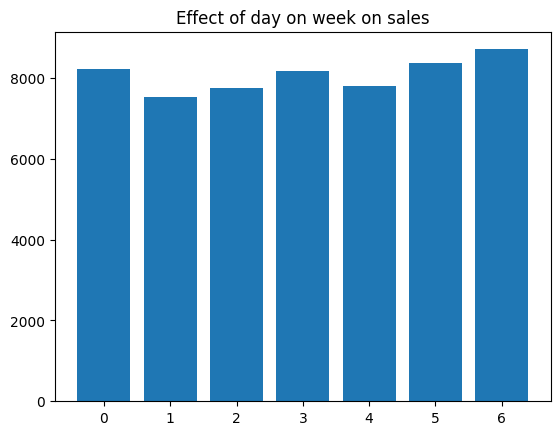

In [20]:
# See if at any particular weekday, the cnt is more or not
plt.title("Effect of day on week on sales")
plt.bar(x=df["weekday"], height=df["cnt"])

#### Conclusion: Normally on weekends the sale is more compared to other days
<br><br>

<BarContainer object of 730 artists>

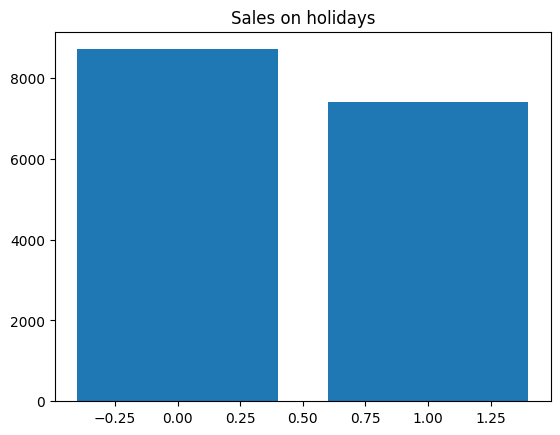

In [21]:
# See if holiday has any effect
plt.title("Sales on holidays")
plt.bar(x=df["holiday"], height=df["cnt"])

#### Conclusion: The sales on holidays is little bit `lower` compared to normal days
This is an expected one, because people normally need more bikes on weekdays for use.
<br><br>

### Dropping `casual` and `registered` as these are the breakdown of `cnt`

In [22]:
df.drop(["casual", "registered"], axis=1, inplace=True, errors="ignore")

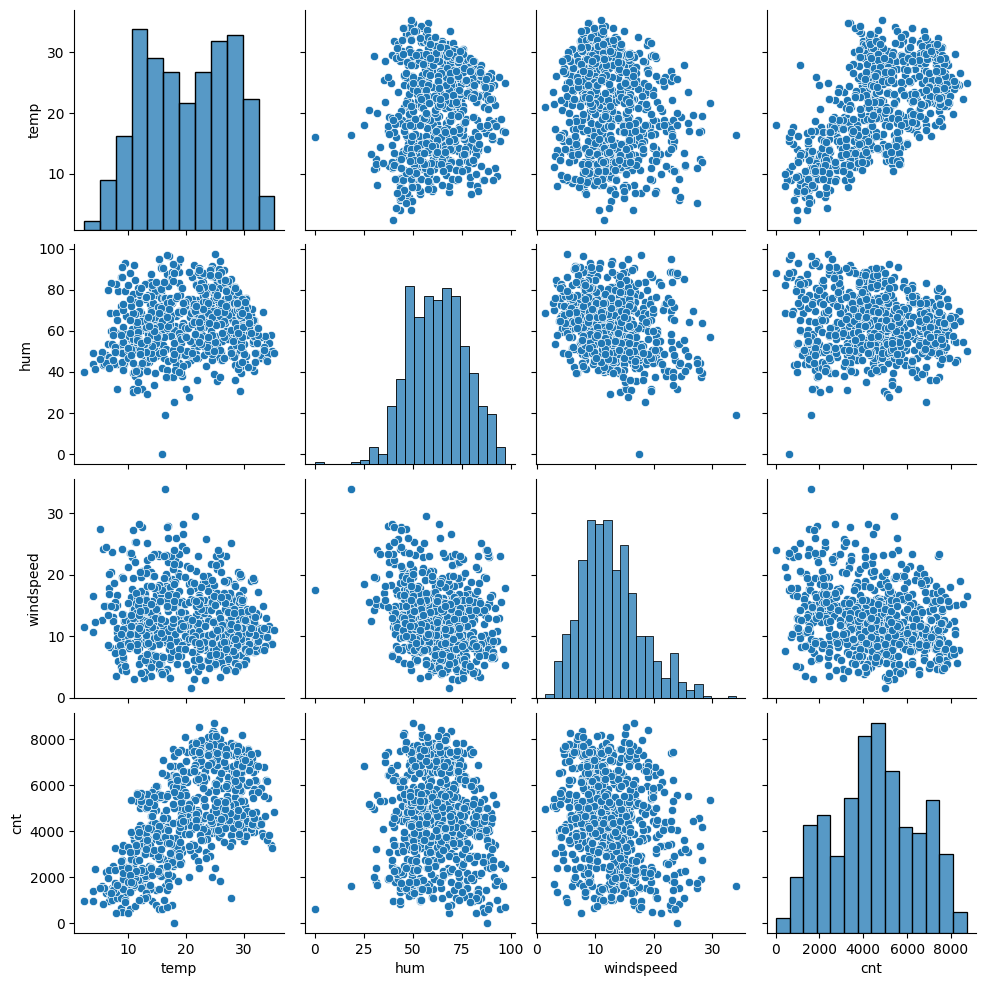

In [23]:
sns.pairplot(data=df, vars=['temp','hum','windspeed','cnt'])

From the pairplot we can see that `cnt` has a linear relationship with:<br>
&nbsp; - `temp` -> from the graph, one can see that almost a linear relationship is being formed.<br>
<br><br>

### Check for the outliers (with boxPlots)

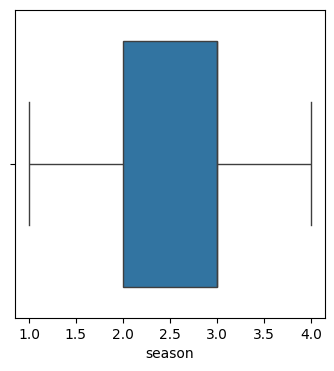

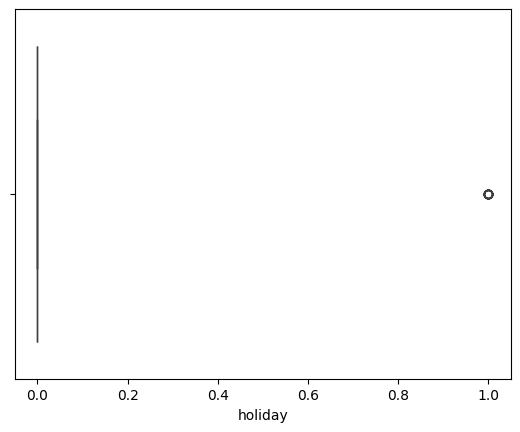

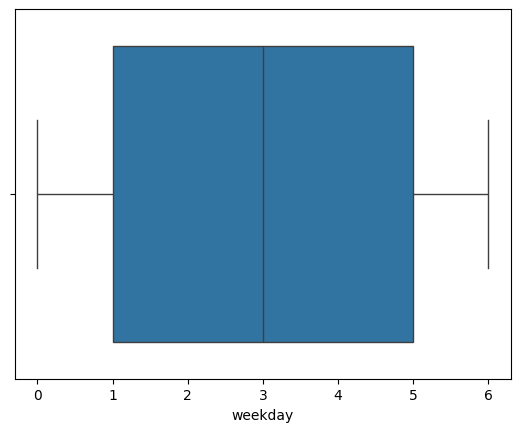

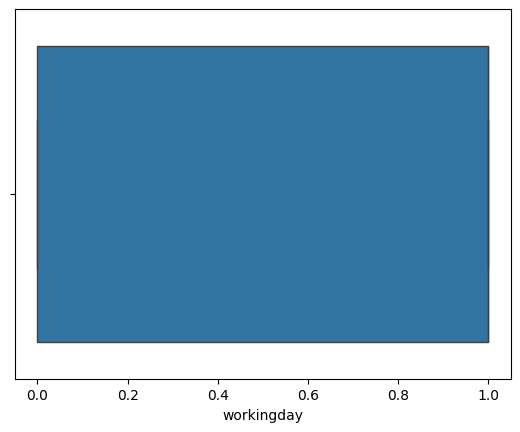

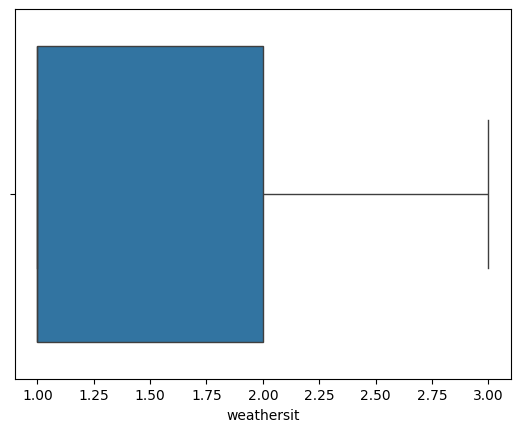

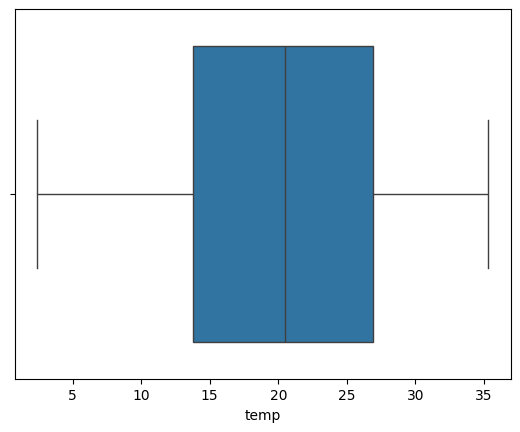

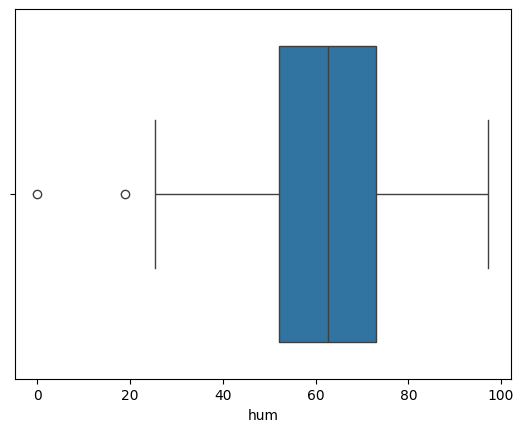

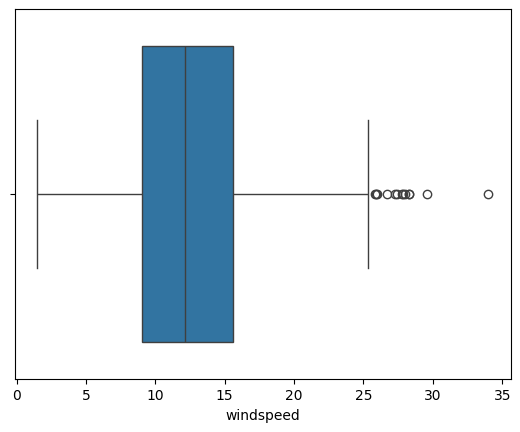

In [24]:
plt.figure(figsize=(4, 4))
cols = df.columns.tolist()
for col in cols:
    if col in ["cnt", "yr"]:
        continue
    sns.boxplot(data=df, x=col)
    plt.show()

<b>There are not as such outliers present in the data, but we need to normalize data so that the comes at almost same scale
<br><br>

## Normalization

### We will be using MinMax Scaler

In [25]:
df.head()

,season,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,0,3,1,1,9.305237,43.6957,12.522300,1600


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# df_train = df.copy()

cols_to_scale = ["temp", "hum", "windspeed"]
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

df.head()

,season,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,0,6,0,2,0.355170,0.828620,0.284606,985
1,1,0,0,0,0,2,0.379232,0.715771,0.466215,801
2,1,0,0,1,1,1,0.171000,0.449638,0.465740,1349
3,1,0,0,2,1,1,0.175530,0.607131,0.284297,1562
4,1,0,0,3,1,1,0.209120,0.449313,0.339143,1600


# Building Model

## Using StatsModels

### Making a train function so that it can be used further

In [27]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

def train_model(df, cols_to_drop=[], train_size=0.7, mode="stats"):
    target_column = "cnt"
    test_size = 1-train_size
    
    # df.drop(cols_to_drop, axis=1)
    cols_to_drop.append(target_column)

    # Train test split
    df_train, df_test = train_test_split(df, train_size=train_size, test_size=test_size, random_state=100)

    # getting X_train, y_train & X_test and y_test
    X_train, y_train = df_train.drop(cols_to_drop, axis=1), df_train[target_column]
    X_test, y_test = df_test.drop(cols_to_drop, axis=1), df_test[target_column]

    # fit the model
    ## adding the constant
    if mode == "stats":
        X_train = sm.add_constant(X_train)
        model = sm.OLS(y_train, X_train).fit()
    
        X_test = sm.add_constant(X_test)

    elif mode == "lr":
        model = LinearRegression()
        model.fit(X_train, y_train)
        
    predictions = model.predict(X_test)

    # Calculating r2_score on predictions
    r2 = r2_score(y_test, predictions)

    # Return the trained model, the r2 score and the residuals for the analysis
    return model, r2, round(predictions - y_test, 2), X_train, y_train, X_test, y_test

In [28]:
model, r2, residuals, _, _, _, _ = train_model(df)
print(model.summary(), "\n\n\n", "R2 Score on predictions:", r2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     225.6
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          8.77e-170
Time:                        17:27:10   Log-Likelihood:                -4173.4
No. Observations:                 510   AIC:                             8367.
Df Residuals:                     500   BIC:                             8409.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2013.3033    265.877      7.572      0.0

<br><b>Findings</b><br>
R-squared is <b>0.802</b>
<br><br>
<b>Also, These features have high p-value which can be dropped right away. Because high p-value rejects the null hypothesis.</b>
<br>Threshold: 0.05
<br><br>

<Figure size 640x480 with 0 Axes>

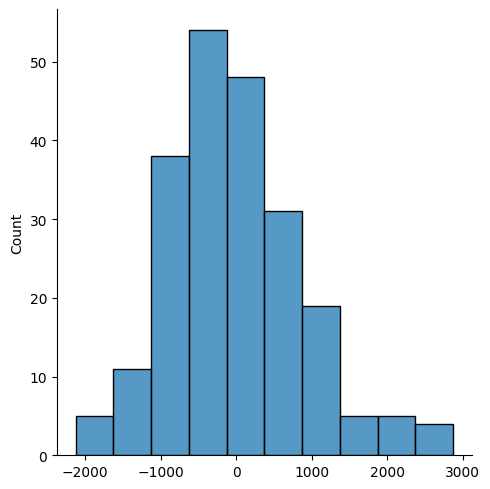

In [29]:
# Residual Analysis
fig=plt.figure()
sns.displot(residuals, bins=10)

### Interesting: 😲

<br>
We can clearly see that the `Residuals` are following a normal distribution - Hence it validated our assumption of <b>MultiVariate Normality</b> for Linear Regression
<br><br>

#### Check by dropping the column with most p-value - `workingday`: 0.049

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     251.9
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          3.69e-170
Time:                        17:27:11   Log-Likelihood:                -4175.3
No. Observations:                 510   AIC:                             8369.
Df Residuals:                     501   BIC:                             8407.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2129.6760    259.992      8.191      0.0

<Figure size 640x480 with 0 Axes>

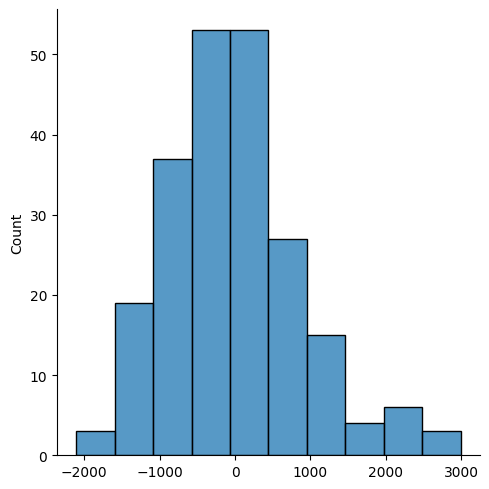

In [30]:
cols_to_drop = ["workingday"]

model, r2, residuals, _, _, _, _ = train_model(df, cols_to_drop=cols_to_drop)
print(model.summary(), "\n\n\n", "R2 Score on predictions:", r2)

# Residual Analysis
fig=plt.figure()
sns.displot(residuals, bins=10)

#### Findings:

The R2 and Adjusted R2 are more or less same as the previous one, so we are able to capture the most of it in the previous model.
<br><br>

### We can go on checking and dropping the columns manually every time. But the better method to do this automatically is using `RFE`

In [31]:
# Training LinearRegression Model to use it in RFE
model, r2, residuals, X_train, y_train, X_test, y_test = train_model(df, mode="lr")

In [32]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE

rfe = RFE(model, n_features_to_select=5, step=1) # running RFE and for now we want 5 features at max
rfe = rfe.fit(X_train, y_train)

In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season', False, 3),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('weekday', False, 5),
 ('workingday', False, 4),
 ('weathersit', True, 1),
 ('temp', True, 1),
 ('hum', False, 2),
 ('windspeed', True, 1)]

In [34]:
# Supported columns
col = list(X_train.columns[rfe.support_])
col

['yr', 'holiday', 'weathersit', 'temp', 'windspeed']

In [35]:
# Not supported columns
X_train.columns[~rfe.support_]

Index(['season', 'weekday', 'workingday', 'hum'], dtype='object')

<b>We can see here - columns: `workingday` & `hum` is not selected by RFE too. (We were on right path above when doing manually)
<br><br>

In [36]:
# Building StatsModel & checking the model performance using RFE supported features.
col.append('cnt')
model, r2, residuals, _, _, _, _ = train_model(df[col])
print(model.summary(), "\n\n\n", "R2 Score on predictions:", r2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     315.0
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          1.66e-152
Time:                        17:27:13   Log-Likelihood:                -4225.5
No. Observations:                 510   AIC:                             8463.
Df Residuals:                     504   BIC:                             8488.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2627.2332    201.932     13.010      0.0

<b>We have fitted the model only with `5 features` and now the p-value for each feature is low enough too.
<br><br>
Question is..</b> Can we train model with lesser features? Let's see!

#### Trainig model with 2 features

In [37]:
# Training LinearRegression Model to use it in RFE
model, r2, residuals, X_train, y_train, X_test, y_test = train_model(df, mode="lr")

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE

rfe = RFE(model, n_features_to_select=2, step=1) # running RFE and for now we want 5 features at max
rfe = rfe.fit(X_train, y_train)

col = list(X_train.columns[rfe.support_])
col.append('cnt')

model, r2, residuals, _, _, _, _ = train_model(df[col])
print(model.summary(), "\n\n\n", "R2 Score on predictions:", r2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          3.34e-130
Time:                        17:27:13   Log-Likelihood:                -4287.0
No. Observations:                 510   AIC:                             8580.
Df Residuals:                     507   BIC:                             8593.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        710.9783    129.481      5.491      0.0

<br>

😲😲 We are getting r2 score again `0.66` which is much lower than our first model. (Which has R2 score as `0.8`)

## Final model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     251.9
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          3.69e-170
Time:                        17:27:14   Log-Likelihood:                -4175.3
No. Observations:                 510   AIC:                             8369.
Df Residuals:                     501   BIC:                             8407.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2129.6760    259.992      8.191      0.0

<Figure size 640x480 with 0 Axes>

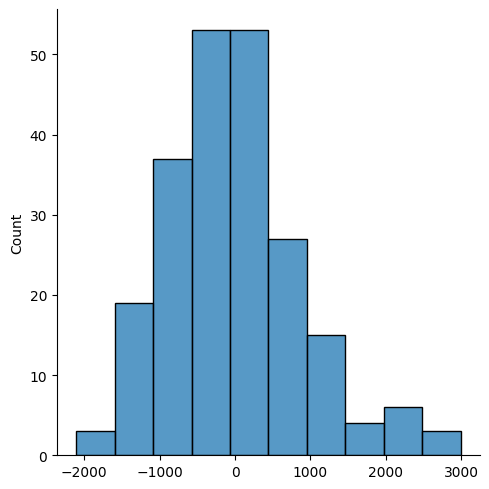

In [38]:
# becasue the maximum R2 we were getting is from this model
cols_to_drop = ["workingday"]

model, r2, residuals, _, _, X_test, y_test = train_model(df, cols_to_drop=cols_to_drop)
print(model.summary(), "\n\n\n", "R2 Score on predictions:", r2)

# Residual Analysis
fig=plt.figure()
sns.displot(residuals, bins=10)

### VIF

In [39]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X_train = df.drop(["workingday", "cnt"], axis=1)
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,hum,24.10
4,weathersit,12.98
5,temp,7.57
0,season,6.92
7,windspeed,4.40
3,weekday,3.06
1,yr,1.93
2,holiday,1.04


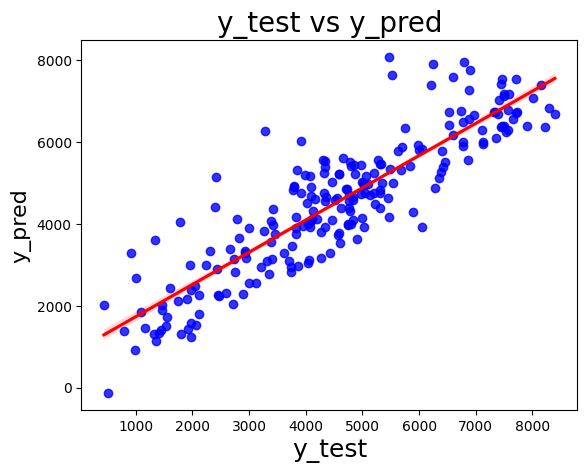

In [41]:
plt.figure()
sns.regplot(x=y_test, y=model.predict(X_test), ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

### Q-Q Plot

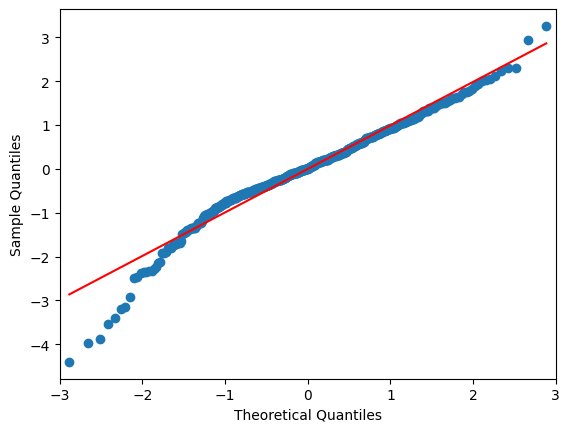

In [42]:
sm.qqplot(model.resid, fit=True, line="r")
plt.show()

# Conclusion:
<ol>
    <li>The most correlated feature with the target variable is `temp`</li>
    <li>The assumptions for the Linear Regression holds true.</li>
    <li>Demand of the number of bikes to be rented depends on: temperature, year, humidity, weatherSituation</li>
</ol>